In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import constants

data_10_percent = 'kddcup.data_10_percent'
data_full = 'kddcup.data'
data = pd.read_csv(data_10_percent, names=constants.names)

# Remove Traffic features computed using a two-second time window
data.drop(constants.traffic_features, inplace=True, axis=1)

In [61]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.


In [62]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000


In [63]:
from sklearn import preprocessing

le_dicts = {}

for categorical_name in constants.categorical_names:
    le = preprocessing.LabelEncoder()
    le.fit(data[categorical_name])
    le_dicts[categorical_name] = dict(zip(le.transform(le.classes_), le.classes_))
    print(categorical_name, ':', le_dicts[categorical_name])
    data[categorical_name + '_num'] = le.fit_transform(data[categorical_name])

('protocol_type', ':', {0: 'icmp', 1: 'tcp', 2: 'udp'})
('service', ':', {0: 'IRC', 1: 'X11', 2: 'Z39_50', 3: 'auth', 4: 'bgp', 5: 'courier', 6: 'csnet_ns', 7: 'ctf', 8: 'daytime', 9: 'discard', 10: 'domain', 11: 'domain_u', 12: 'echo', 13: 'eco_i', 14: 'ecr_i', 15: 'efs', 16: 'exec', 17: 'finger', 18: 'ftp', 19: 'ftp_data', 20: 'gopher', 21: 'hostnames', 22: 'http', 23: 'http_443', 24: 'imap4', 25: 'iso_tsap', 26: 'klogin', 27: 'kshell', 28: 'ldap', 29: 'link', 30: 'login', 31: 'mtp', 32: 'name', 33: 'netbios_dgm', 34: 'netbios_ns', 35: 'netbios_ssn', 36: 'netstat', 37: 'nnsp', 38: 'nntp', 39: 'ntp_u', 40: 'other', 41: 'pm_dump', 42: 'pop_2', 43: 'pop_3', 44: 'printer', 45: 'private', 46: 'red_i', 47: 'remote_job', 48: 'rje', 49: 'shell', 50: 'smtp', 51: 'sql_net', 52: 'ssh', 53: 'sunrpc', 54: 'supdup', 55: 'systat', 56: 'telnet', 57: 'tftp_u', 58: 'tim_i', 59: 'time', 60: 'urh_i', 61: 'urp_i', 62: 'uucp', 63: 'uucp_path', 64: 'vmnet', 65: 'whois'})
('flag', ':', {0: 'OTH', 1: 'REJ', 

In [64]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [65]:
data['label_binary_num'] = data.label.apply(lambda label: 0 if label == 'normal.' else 1)
data['label_binary_num'].value_counts()

1    396743
0     97278
Name: label_binary_num, dtype: int64

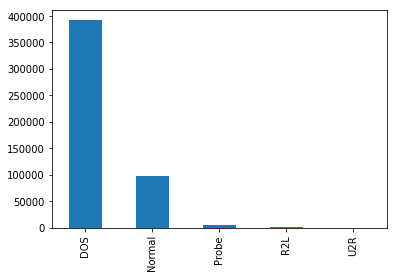

In [66]:
data['label_four'] = data.label.apply(lambda label: constants.label_to_four_attack_class[label])
data['label_four_num'] = data.label_four.apply(lambda label: constants.five_classes_to_num[label])
pd.value_counts(data['label_four'], sort=True).plot.bar()

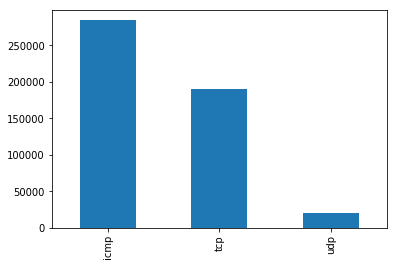

In [67]:
#all data
pd.value_counts(data['protocol_type'], sort=True).plot.bar()

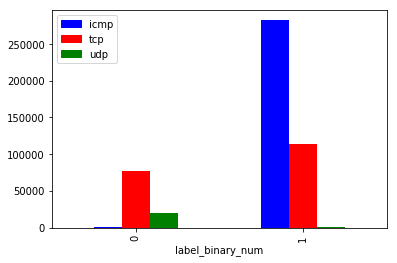

In [68]:
#all data according to label_binary
pd.pivot_table(data[['protocol_type_num', 'label_binary_num']].assign(count=1),
               index=['label_binary_num'],
               columns=['protocol_type_num'],
               aggfunc='count').plot(kind='bar', color=constants.my_colors)

handles = [mpatches.Patch(label=le_dicts['protocol_type'][i],
                          color=constants.my_colors[i]) for i in sorted(le_dicts['protocol_type'])]
plt.legend(handles=handles, loc=2)
plt.show()


In [69]:
pd.pivot_table(data[['protocol_type', 'label_binary_num']].assign(count=1),
               index=['label_binary_num'],
               columns=['protocol_type'],
               aggfunc='count')

count               
protocol_type       icmp     tcp    udp
label_binary_num                       
0                   1288   76813  19177
1                 282314  113252   1177

In [70]:
data['service'].value_counts()[:10]

ecr_i       281400
private     110893
http         64293
smtp          9723
other         7237
domain_u      5863
ftp_data      4721
eco_i         1642
ftp            798
finger         670
Name: service, dtype: int64

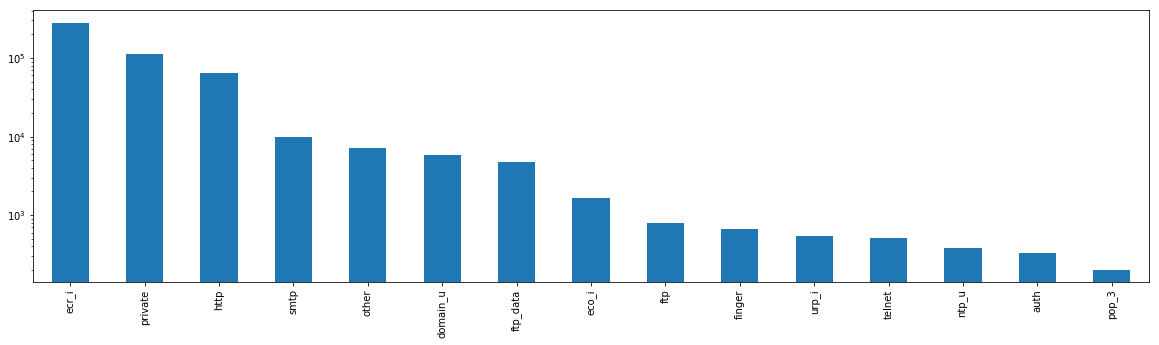

In [71]:
#all data by service
pd.value_counts(data['service'], sort=True).mask(lambda x: x < 200)\
                                           .dropna()\
                                           .plot(kind='bar', logy=True, figsize=(20, 5))

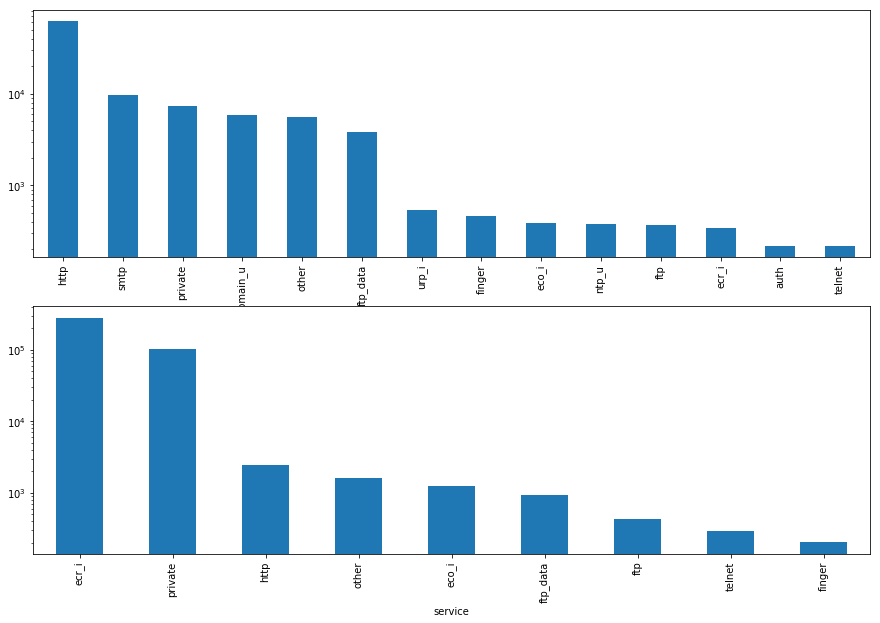

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

pd.pivot_table(data[['service_num', 'service', 'label_binary_num']].assign(count=1),
               index=['service'],
               columns=['label_binary_num'],
               aggfunc='count')['count'][0].mask(lambda x: x < 200)\
                                           .dropna().sort_values(ascending=False).plot(kind='bar',
                                                                                       logy=True,
                                                                                       ax=axes[0])

pd.pivot_table(data[['service_num', 'service', 'label_binary_num']].assign(count=1),
               index=['service'],
               columns=['label_binary_num'],
               aggfunc='count')['count'][1].mask(lambda x: x < 200)\
                                           .dropna().sort_values(ascending=False).plot(kind='bar',
                                                                                       logy=True,
                                                                                       ax=axes[1])

In [73]:
# without NA in any column
pd.pivot_table(data[['service', 'label_binary_num']].assign(count=1),
               index=['service'],
               columns=['label_binary_num'],
               aggfunc='count').sort_values(('count', 0), ascending=False).dropna()

count          
label_binary_num        0         1
service                            
http              61886.0    2407.0
smtp               9598.0     125.0
private            7366.0  103527.0
domain_u           5862.0       1.0
other              5632.0    1605.0
ftp_data           3798.0     923.0
urp_i               537.0       1.0
finger              468.0     202.0
eco_i               389.0    1253.0
ftp                 373.0     425.0
ecr_i               345.0  281055.0
auth                220.0     108.0
telnet              219.0     294.0
pop_3                79.0     123.0
time                 52.0     105.0
IRC                  42.0       1.0
X11                   9.0       2.0
domain                3.0     113.0
tim_i                 2.0       5.0
ssh                   1.0     104.0
shell                 1.0     111.0

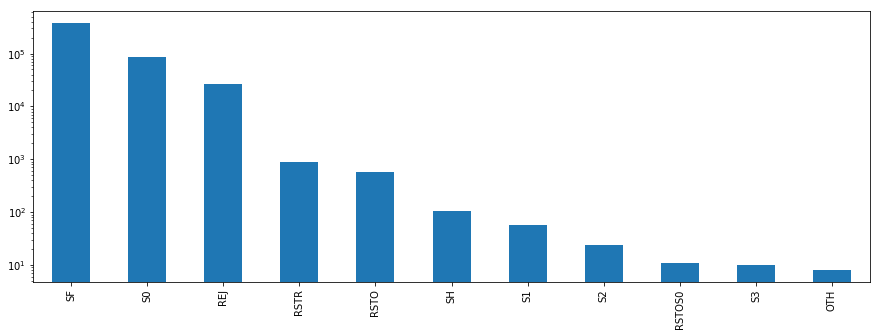

In [74]:
pd.value_counts(data['flag'], sort=True).plot(kind='bar', logy=True, figsize=(15, 5))

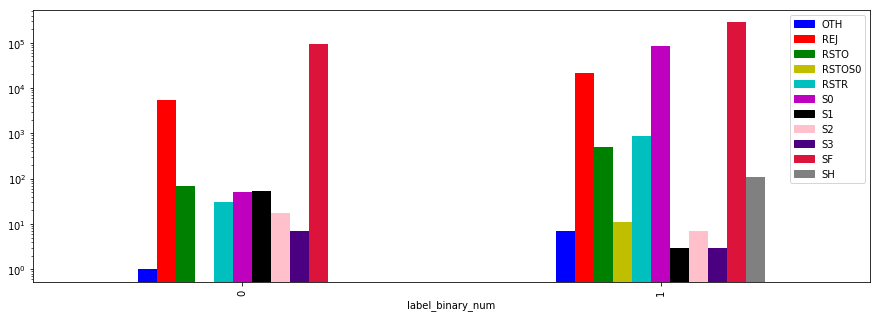

In [75]:
#flag according to label_binary
pd.pivot_table(data[['flag_num', 'label_binary_num']].assign(count=1),
               index=['label_binary_num'],
               columns=['flag_num'],
               aggfunc='count').plot(kind='bar', color=constants.my_colors, logy=True, legend=False, figsize=(15, 5))

handles = [mpatches.Patch(label=le_dicts['flag'][i],
                          color=constants.my_colors[i]) for i in sorted(le_dicts['flag'])]
plt.legend(handles=handles)
plt.show()

In [76]:
pd.pivot_table(data[['flag', 'label_binary_num']].assign(count=1),
               index=['label_binary_num'],
               columns=['flag'],
               aggfunc='count')

count                                                     \
flag               OTH      REJ   RSTO RSTOS0   RSTR       S0    S1    S2   
label_binary_num                                                            
0                  1.0   5341.0   67.0    NaN   31.0     51.0  54.0  17.0   
1                  7.0  21534.0  512.0   11.0  872.0  86956.0   3.0   7.0   

                                        
flag               S3        SF     SH  
label_binary_num                        
0                 7.0   91709.0    NaN  
1                 3.0  286731.0  107.0

In [77]:
# Corr with binary label
data.drop(constants.categorical_names + constants.label_names, axis=1).corrwith(data.label_binary_num).sort_values()

logged_in            -0.795282
protocol_type_num    -0.616601
flag_num             -0.155672
service_num          -0.131723
duration             -0.118014
num_access_files     -0.054268
dst_bytes            -0.037709
is_guest_login       -0.032299
num_file_creations   -0.018671
num_shells           -0.014951
num_root             -0.011006
su_attempted         -0.008789
hot                  -0.006327
root_shell           -0.005871
num_compromised      -0.005046
urgent               -0.001498
num_failed_logins    -0.001060
src_bytes             0.000936
land                  0.002542
wrong_fragment        0.023630
num_outbound_cmds          NaN
is_host_login              NaN
dtype: float64

In [78]:
# Corr with 5 labels 
data.drop(constants.categorical_names + constants.label_names, axis=1).corrwith(data.label_four_num).sort_values()

logged_in            -0.789552
protocol_type_num    -0.622297
service_num          -0.141445
flag_num             -0.135043
duration             -0.128845
num_access_files     -0.054097
is_guest_login       -0.052703
dst_bytes            -0.043191
hot                  -0.032488
num_file_creations   -0.019785
num_shells           -0.016380
num_root             -0.010988
root_shell           -0.010185
num_failed_logins    -0.010071
su_attempted         -0.008964
num_compromised      -0.005057
urgent               -0.003045
src_bytes            -0.002457
land                  0.002647
wrong_fragment        0.024343
num_outbound_cmds          NaN
is_host_login              NaN
dtype: float64

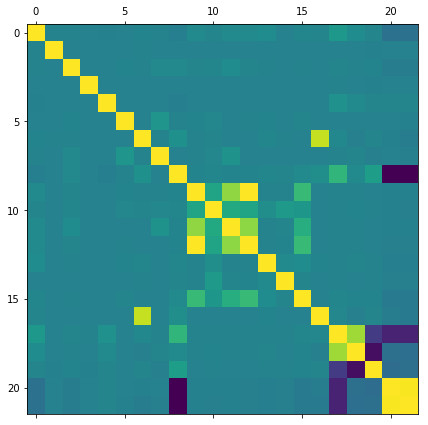

In [79]:
# corr heatmap
# last 2 are label_binary_num and label_four_num that's why it so hot
plt.figure(figsize=(7,7))
plt.matshow(data.drop(constants.categorical_names + \
                      ['label', 'label_four'] + \
                      constants.names_without_changes, axis=1).corr(), fignum=1)

In [80]:
for i, elem in enumerate(data.drop(constants.categorical_names + \
                                   ['label', 'label_four'] + \
                                   constants.names_without_changes, axis=1).columns.tolist()):
    print(i, elem)

(0, 'duration')
(1, 'src_bytes')
(2, 'dst_bytes')
(3, 'land')
(4, 'wrong_fragment')
(5, 'urgent')
(6, 'hot')
(7, 'num_failed_logins')
(8, 'logged_in')
(9, 'num_compromised')
(10, 'root_shell')
(11, 'su_attempted')
(12, 'num_root')
(13, 'num_file_creations')
(14, 'num_shells')
(15, 'num_access_files')
(16, 'is_guest_login')
(17, 'protocol_type_num')
(18, 'service_num')
(19, 'flag_num')
(20, 'label_binary_num')
(21, 'label_four_num')


In [81]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=42)

data_test = data.drop(constants.categorical_names +\
                      constants.label_names +\
                      constants.names_without_changes, axis=1)

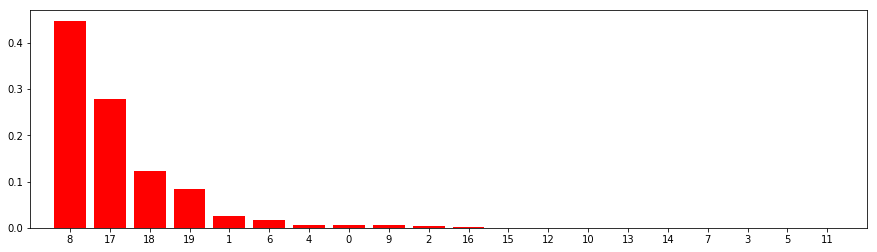

In [82]:
#for 2 labels
forest.fit(data_test, data['label_binary_num'])

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 4))
plt.bar(range(data_test.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_test.shape[1]), indices)
plt.xlim([-1, data_test.shape[1]])
plt.show()

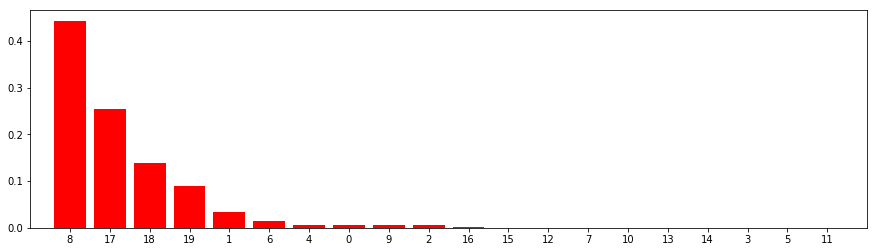

In [83]:
#for 5 labels
forest.fit(data_test, data['label_four_num'])

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 4))
plt.bar(range(data_test.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_test.shape[1]), indices)
plt.xlim([-1, data_test.shape[1]])
plt.show()

In [87]:
import warnings
import utils

warnings.filterwarnings('ignore')
np.random.seed(42)
data_10_percent = 'kddcup.data_10_percent'
data_full = 'kddcup.data'
data = pd.read_csv(data_10_percent, names=constants.names)

# Remove Traffic features computed using a two-second time window
data.drop(constants.traffic_features, inplace=True, axis=1)

# Categorical features to numeric labels

from sklearn import preprocessing

le_dicts = {}

for categorical_name in constants.categorical_names:
    le = preprocessing.LabelEncoder()
    le.fit(data[categorical_name])
    le_dicts[categorical_name] = dict(zip(le.transform(le.classes_), le.classes_))
#     print(categorical_name, ':', le_dicts[categorical_name])
    data[categorical_name + '_num'] = le.fit_transform(data[categorical_name])

data['label_binary_num'] = data.label.apply(lambda label: 1 if label == 'normal.' else -1)
data['label_four'] = data.label.apply(lambda label: constants.label_to_four_attack_class[label])
data['label_four_num'] = data.label_four.apply(lambda label: constants.five_classes_to_num[label])
data.drop(constants.categorical_names + ['label', 'label_four'], axis=1, inplace=True)
data.shape

(494021, 24)

In [88]:
data = data[data['label_four_num'] != 4]
data.shape

(102563, 24)

In [89]:
pd.value_counts(data['label_four_num'], sort=True)

0    97278
1     4107
2     1126
3       52
Name: label_four_num, dtype: int64

In [90]:
# Normalize data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = data.copy(deep=True)
data_scaled[constants.names_to_normalize] = min_max_scaler.fit_transform(data[constants.names_to_normalize])

In [91]:
#test-train division
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.1, random_state=42)

Y_train_bin = X_train.label_binary_num
Y_train_many_classes = X_train.label_four_num

Y_test_bin = X_test.label_binary_num
Y_test_many_classes = X_test.label_four_num

X_train.drop(['label_binary_num', 'label_four_num'], axis=1, inplace=True)
X_test.drop(['label_binary_num', 'label_four_num'], axis=1, inplace=True)

In [92]:
#test-train division scaled  + without features without changes
data_scaled.drop(['label_binary_num', 'label_four_num'] +\
                 constants.names_without_changes,
                 axis=1)

X_train_scaled, X_test_scaled = train_test_split(data_scaled,
                                                 test_size=0.1,
                                                 random_state=42)

In [93]:
# #KMeans for not scaled data 
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score

# kmeans = KMeans(n_clusters=2,
#                 max_iter=500,
#                 random_state=42)

# utils.model_validation(kmeans, X_train, X_test, Y_train_bin, Y_test_bin)

In [94]:
# One class SVM
# Not scaled data

from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.1,
                    gamma=0.00005,
                    kernel='rbf')

utils.model_validation(model,
                       X_train,
                       X_test,
                       Y_train_bin,
                       Y_test_bin,
                       True)

Train: 
[[  281  4457]
 [ 9508 78060]]
('accuracy: ', 0.84870972634498298)
('f1 score: ', 0.91789399417938089)
Test: 
[[  33  514]
 [1039 8671]]
('accuracy: ', 0.84859120600565463)
('f1 score: ', 0.91780894416512304)


In [95]:
# One class SVM
# scaled data

from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.1,
                    gamma=0.00005,
                    kernel='rbf')

utils.model_validation(model,
                       X_train_scaled,
                       X_test_scaled,
                       Y_train_bin,
                       Y_test_bin,
                       True)

Train: 
[[  125  4613]
 [ 1265 86303]]
('accuracy: ', 0.93632049920915217)
('f1 score: ', 0.9670670760404293)
Test: 
[[  16  531]
 [ 131 9579]]
('accuracy: ', 0.93545871112411039)
('f1 score: ', 0.96659939455095856)
